Reproducing work [in this article](https://appliedmachinelearning.blog/2017/11/25/unsupervised-changed-detection-in-multi-temporal-satellite-images-using-pca-k-means-python-code/). 

A simple intro to PCA is [here](http://dilloncamp.com/projects/pca.html)

TLDR is we use PCA for dimensionality reduction and use the X principle components as features for our k-means algorithm.

Basic process is:
1. Compute difference image
2. Determine principle components of the difference image
.
.
.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
% matplotlib inline

Little trick to list package versions

In [2]:
!pip show scikit-image|grep Version

Version: 0.13.1


In [3]:
!pip show scikit-learn|grep Version

Version: 0.19.1


In [4]:
!pip show numpy|grep Version

Version: 1.14.5


## Get familiar with imagery
We start with a visual inspection of our imagery, calculate the absolute difference and apply a couple of filters.

In [5]:
ls

CubbieStation_08232013.jpg* README.md
CubbieStation_08311987.jpg* change_detection.ipynb


In [6]:
image1 = io.imread('CubbieStation_08311987.jpg')
image2 = io.imread('CubbieStation_08232013.jpg')

diff_image = abs(image1 - image2)
print(diff_image.shape)

(1200, 1209)


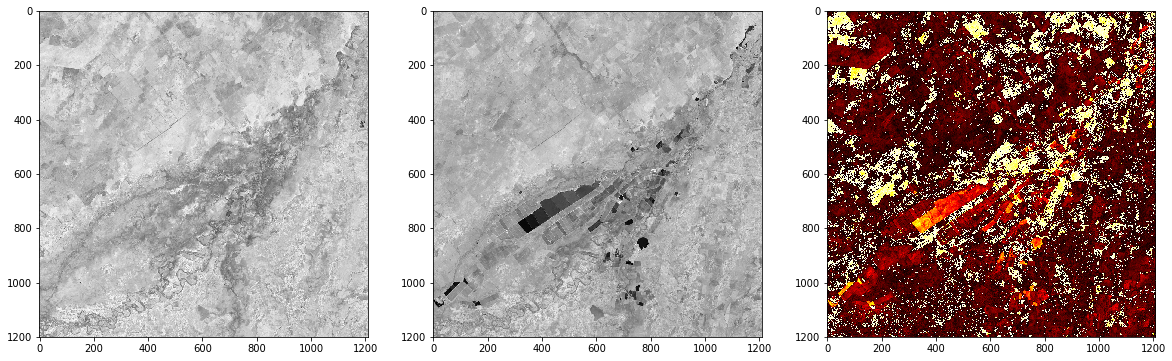

In [13]:
fig_width = 20
fig_height = 8

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
ax1.imshow(image1, cmap="gray") 
ax2.imshow(image2, cmap="gray") 
ax3.imshow(diff_image, cmap="hot"); # crudely calc difference

A couple of things to note from this comparison:
* There is a lot of noise/change we dont care about
* Clouds will need to be handled in real scenario

## Determine Principle components
The original article rolls its own methods for calculating the principle components of the difference image, but sklearn provides us that functionality

In [8]:
n_components=100

pca = PCA(n_components=n_components)
pca.fit(diff_image)

diff_image_pca = pca.fit_transform(diff_image)
print(diff_image_pca.shape)

diff_image_restored = pca.inverse_transform(diff_image_pca)
print(diff_image_restored.shape)

(1200, 100)
(1200, 1209)


In [9]:
np.sum(pca.explained_variance_ratio_)

0.5777004955709127

In [10]:
print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")

The 100 components explain 57% of the variance


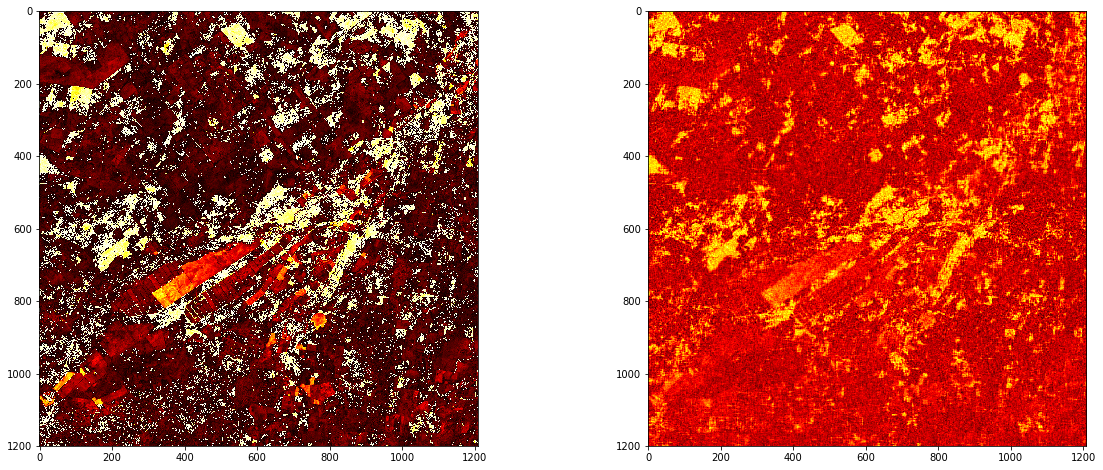

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

ax1.imshow(diff_image, cmap="hot") 
ax2.imshow(diff_image_restored, cmap="hot"); # crudely calc difference